2024

Baghdad, Iraq 2024

Forecasting (FB Prophet)

In [3]:
import pandas as pd
df = pd.read_csv("Baghdad Iraq 2024.csv")
df = df[["datetimeLocal", "value"]]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the datetimeLocal column to pandas datetime format
df['datetimeLocal'] = pd.to_datetime(df['datetimeLocal'])

# Create separate Date and Time columns
df['Date'] = df['datetimeLocal'].dt.date
df['Time'] = df['datetimeLocal'].dt.time
date = df['Date']
time = df['Time']
# Print the resulting DataFrame
print(df[['Date', 'Time']])


            Date      Time
0     2024-03-05  23:00:00
1     2024-03-06  00:00:00
2     2024-03-06  01:00:00
3     2024-03-06  02:00:00
4     2024-03-06  03:00:00
...          ...       ...
1987  2024-05-30  21:00:00
1988  2024-05-30  22:00:00
1989  2024-05-30  23:00:00
1990  2024-05-31  00:00:00
1991  2024-05-31  03:00:00

[1992 rows x 2 columns]


In [4]:
#Combining 2 series to a pandas dataframe
date_time = pd.concat([date, time], axis = 1)
date_time.head()

,Date,Time
0,2024-03-05,23:00:00
1,2024-03-06,00:00:00
2,2024-03-06,01:00:00
3,2024-03-06,02:00:00
4,2024-03-06,03:00:00


In [5]:
date_time.shape

(1992, 2)

In [6]:
print(type(date))
print(type(time))
print(type(date_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
#Combining Date and Time
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)
date_time.head()

,Date,Time,ds
0,2024-03-05,23:00:00,2024-03-05 23:00:00
1,2024-03-06,00:00:00,2024-03-06 00:00:00
2,2024-03-06,01:00:00,2024-03-06 01:00:00
3,2024-03-06,02:00:00,2024-03-06 02:00:00
4,2024-03-06,03:00:00,2024-03-06 03:00:00


In [8]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1992 non-null   object
 1   Time    1992 non-null   object
 2   ds      1992 non-null   object
dtypes: object(3)
memory usage: 46.8+ KB


In [9]:
#Convert ds from object to datetimeLike
# + np.array
data_df = pd.DataFrame()
data_df['ds'] = pd.to_datetime(date_time['ds'])
data_df.head()


,ds
0,2024-03-05 23:00:00
1,2024-03-06 00:00:00
2,2024-03-06 01:00:00
3,2024-03-06 02:00:00
4,2024-03-06 03:00:00


In [10]:
df.reset_index()
df.drop_duplicates()
df.head()

,datetimeLocal,value,Date,Time
0,2024-03-05 23:00:00+03:00,41,2024-03-05,23:00:00
1,2024-03-06 00:00:00+03:00,34,2024-03-06,00:00:00
2,2024-03-06 01:00:00+03:00,36,2024-03-06,01:00:00
3,2024-03-06 02:00:00+03:00,32,2024-03-06,02:00:00
4,2024-03-06 03:00:00+03:00,23,2024-03-06,03:00:00


In [11]:
data_df['ds'] = np.array(data_df['ds'])
data_df['y'] = df['value']
data_df.head()


,ds,y
0,2024-03-05 23:00:00,41
1,2024-03-06 00:00:00,34
2,2024-03-06 01:00:00,36
3,2024-03-06 02:00:00,32
4,2024-03-06 03:00:00,23


In [12]:
print(data_df.tail())  # Check the first few rows

                      ds    y
1987 2024-05-30 21:00:00   91
1988 2024-05-30 22:00:00  130
1989 2024-05-30 23:00:00  130
1990 2024-05-31 00:00:00  100
1991 2024-05-31 03:00:00   70


In [13]:
print(type(data_df))   # Verify that it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pip install prophet

In [ ]:
pip install pystan~=2.14

In [14]:
from prophet import Prophet

#Train the model
model = Prophet()
model.fit(data_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/_qqbznr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/ha2tyr0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84480', 'data', 'file=/tmp/tmpurgqeg6v/_qqbznr7.json', 'init=/tmp/tmpurgqeg6v/ha2tyr0a.json', 'output', 'file=/tmp/tmpurgqeg6v/prophet_model2kh3raec/prophet_model-20240726110327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future_predict = model.make_future_dataframe(periods = 100, freq = 'h')
future_predict.tail()

,ds
2087,2024-06-04 03:00:00
2088,2024-06-04 04:00:00
2089,2024-06-04 05:00:00
2090,2024-06-04 06:00:00
2091,2024-06-04 07:00:00


In [16]:
forecast = model.predict(future_predict)
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']]
forecast.loc[:, ['ds', 'yhat', 'yhat_lower', 'yhat_upper']] = np.array(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2087,2024-06-04 03:00:00,59.317242,19.085405,101.776823,58.464812,60.002803,2.315804,2.315804,2.315804,6.429386,6.429386,6.429386,-4.113582,-4.113582,-4.113582,0.0,0.0,0.0,61.633045
2088,2024-06-04 04:00:00,59.341130,15.572127,101.751647,58.467431,60.045621,-0.832960,-0.832960,-0.832960,3.622303,3.622303,3.622303,-4.455264,-4.455264,-4.455264,0.0,0.0,0.0,58.508170
2089,2024-06-04 05:00:00,59.365019,14.400864,100.273216,58.473767,60.080086,-3.114935,-3.114935,-3.114935,1.630039,1.630039,1.630039,-4.744975,-4.744975,-4.744975,0.0,0.0,0.0,56.250083
2090,2024-06-04 06:00:00,59.388907,14.641227,97.002721,58.484495,60.113270,-3.016750,-3.016750,-3.016750,1.964366,1.964366,1.964366,-4.981116,-4.981116,-4.981116,0.0,0.0,0.0,56.372157
2091,2024-06-04 07:00:00,59.412796,16.859098,105.998898,58.494572,60.151900,-0.744573,-0.744573,-0.744573,4.418158,4.418158,4.418158,-5.162732,-5.162732,-5.162732,0.0,0.0,0.0,58.668223


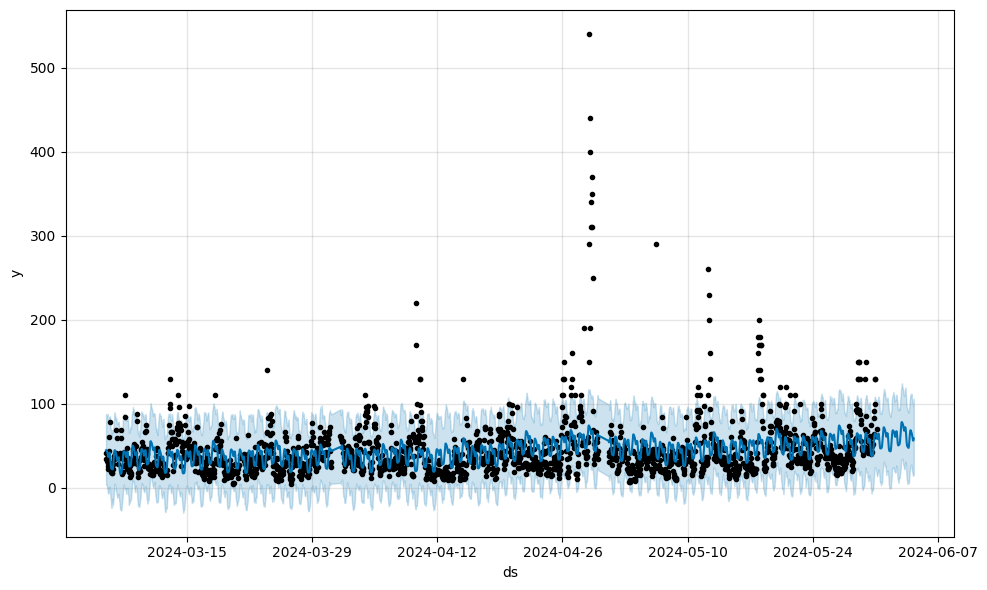

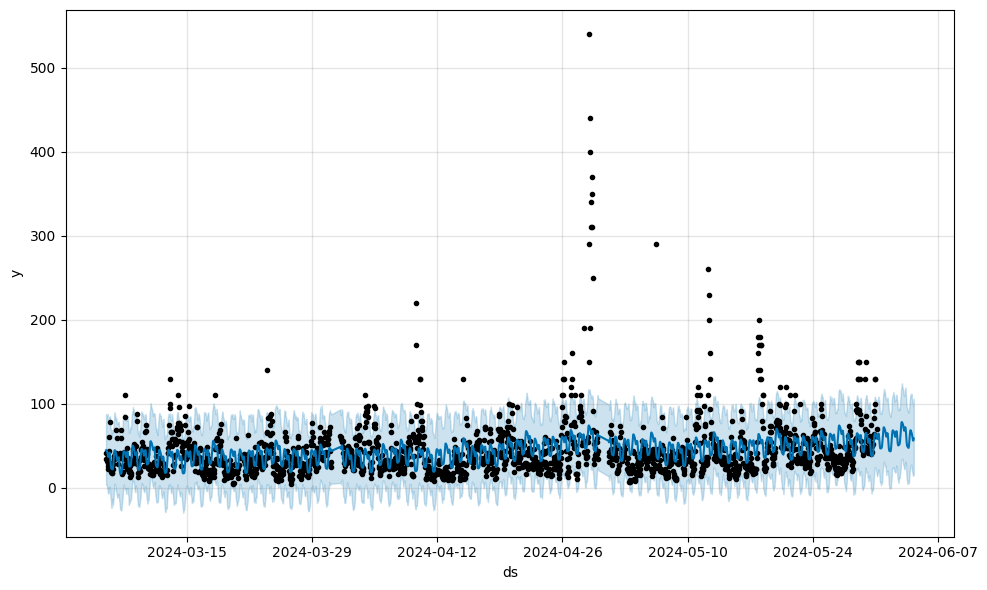

In [17]:
fig1 = model.plot(forecast)
fig1

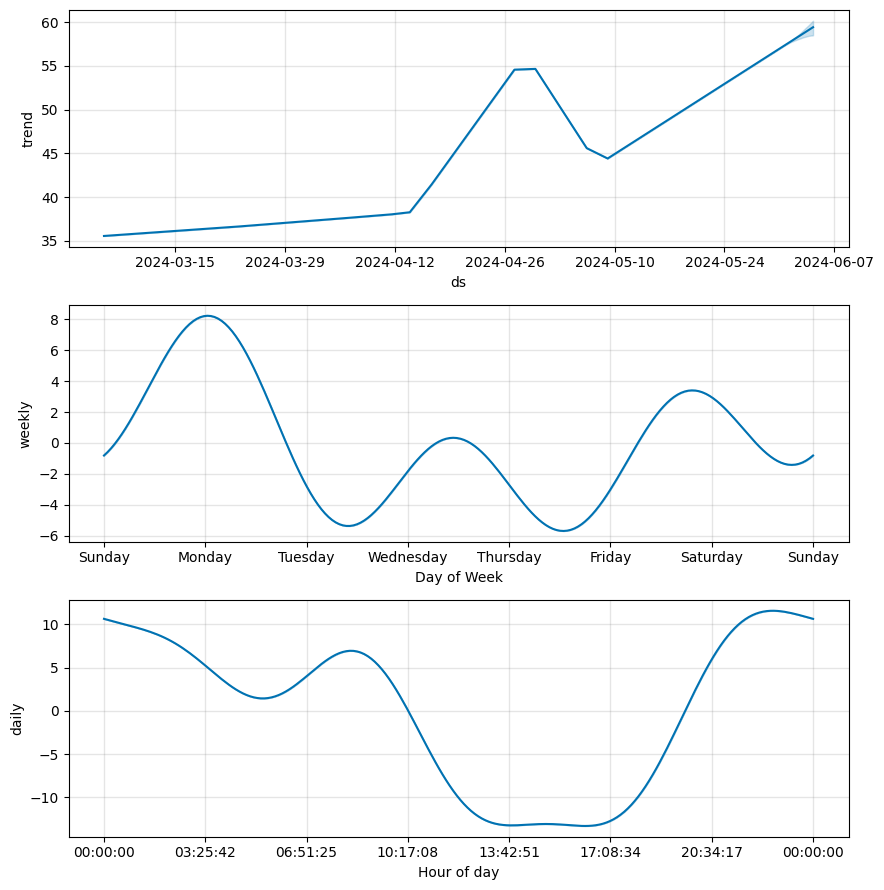

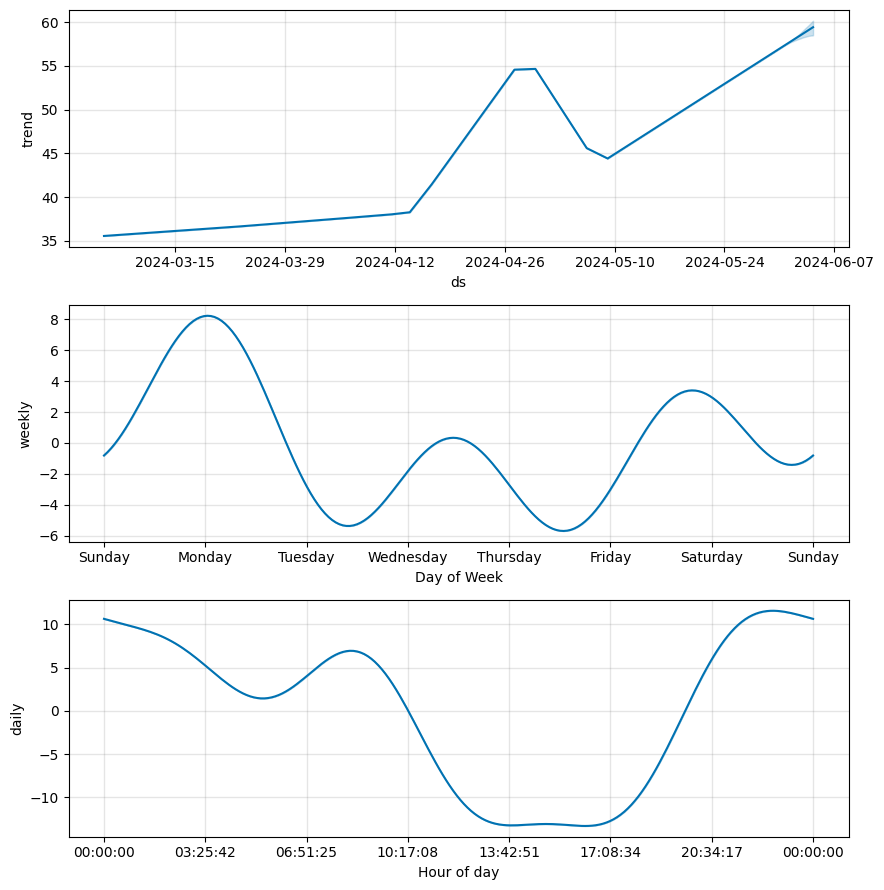

In [18]:
fig2 = model.plot_components(forecast)
fig2

In [26]:
#Comparison (Real vs Predicted)
data_df['ds'] = pd.to_datetime(data_df['ds'])
unknown_df = data_df.iloc[-100:]
data_df = data_df.iloc[:-100]

prophet = Prophet()
prophet.fit(data_df)

future_dates = prophet.make_future_dataframe(periods = 100, freq = 'h')
predictions = prophet.predict(future_dates)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/f4q43zvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpurgqeg6v/cef4hd4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9169', 'data', 'file=/tmp/tmpurgqeg6v/f4q43zvt.json', 'init=/tmp/tmpurgqeg6v/cef4hd4y.json', 'output', 'file=/tmp/tmpurgqeg6v/prophet_modeljlz9xevy/prophet_model-20240726111342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


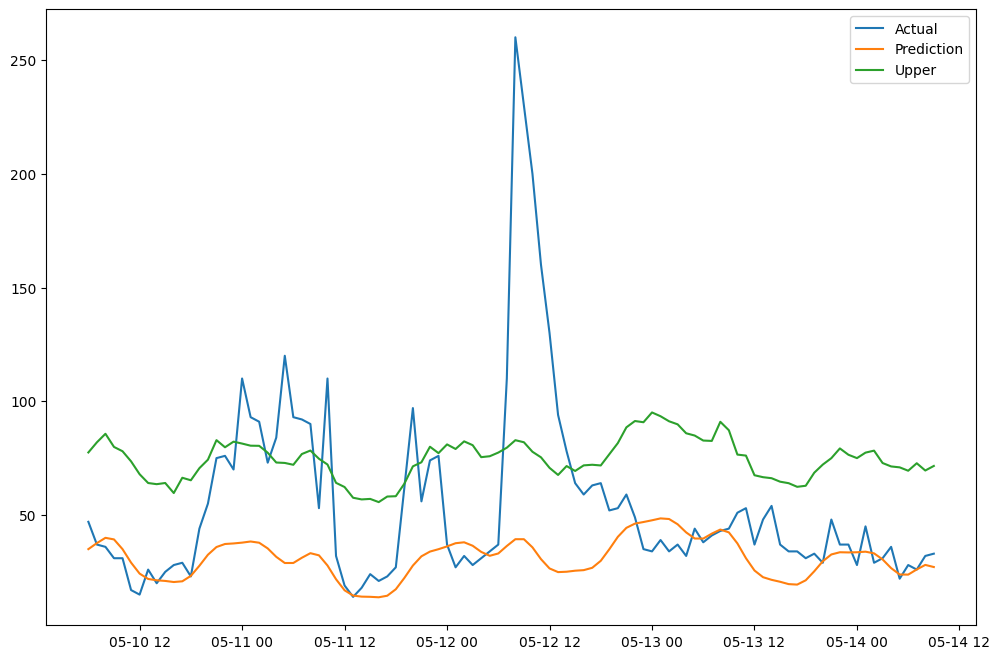

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

pred = predictions[predictions['ds'].isin(unknown_df['ds'])]

plt.plot(unknown_df['ds'],unknown_df['y'], label = "Actual")
plt.plot(pred['ds'],pred['yhat'], label = "Prediction")
plt.plot(pred['ds'],pred['yhat_upper'], label = "Upper")

plt.legend()
plt.show()